<a href="https://colab.research.google.com/github/VedikaSrivastava/PCA/blob/main/MAI_assignment_Vedika_Srivastava_PB_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [ ]:
def normalize(X):
    """
    Normalizes the features in X returns a normalized version of X where the mean value of each feature is 0 and the standard deviation is 1
    ___________________
    X_norm : stores normalized X
    """
    mean = np.mean(X, axis = 0)
    X_norm = X - mean
    
    stdev = np.std(X_norm, axis=0, ddof=1)
    X_norm /= stdev
    
    return X_norm,mean,stdev

In [ ]:
def pca(X):
    """
    Run principal component analysis
    ___________________
    U : stores principle components
    S : stores diagonal matrix
    """
    m,n = np.shape(X)
    U=S=np.zeros(n)
    Sigma = (1 / m) * (X.T @ X)
    U, S, V = np.linalg.svd(Sigma)
    return U, S 

In [ ]:
def displayData(X):
    """
    function displays 2D data stored in X in a grid.
    """
    if X.ndim == 2:
        m,n = np.shape(X)
    elif X.ndim == 1:
        n = np.size(X)
        m=1
        X = X[None]
    width = int(np.round(np.sqrt(n)))
    height = int(n/width)
    
    rows = int(np.floor(np.sqrt(m)))
    cols = int(np.ceil(m/rows))
    
    fig, ax_array = plt.subplots(rows, cols, figsize=(10,10))
    ax_array = [ax_array] if m == 1 else ax_array.ravel()
    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(width, height),cmap='Greys')

In [ ]:
def projectData(X,U,K):
    """
    Computes the reduced data representation when projecting only on to the top K eigenvectors
    """
    Z = np.zeros((X.shape[0], K))
    Z = X @ U[:, :K]
    return Z

In [ ]:
def recoverData(Z, U, K):
    """
    Recovers an approximation of the original data when using the projected data
    """
    X_rec = Z @ U[:, :K].T
    return X_rec

In [ ]:
data = loadmat('/content/drive/MyDrive/D drive/faces.mat') 
X = data['X']

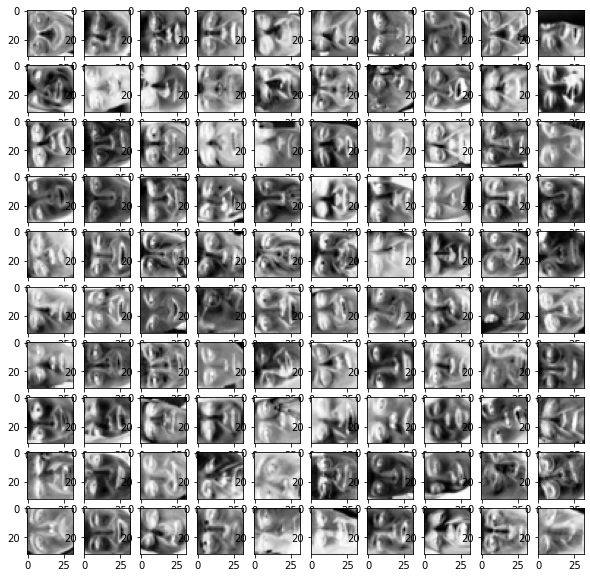

In [ ]:
#display first 100 samples in dataset
displayData(X[:100, :])

In [ ]:
X_norm,mean,stdev = normalize(X)
U,S = pca(X_norm) 

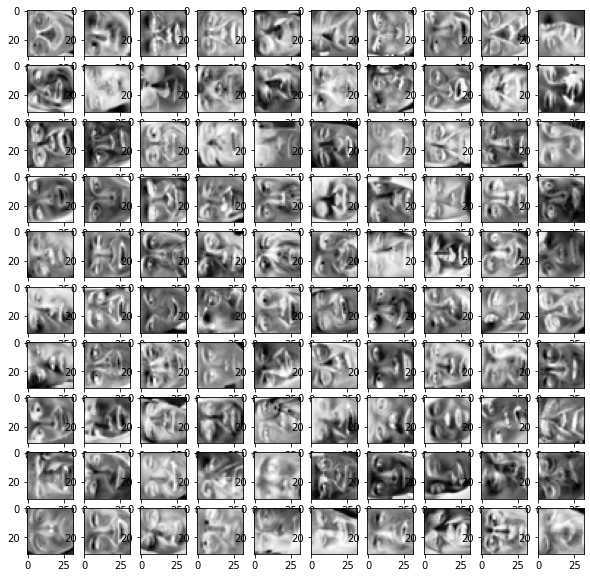

In [ ]:
#display first 100 samples in normalized features
displayData(X_norm[:100, :])

array([[-0.01425307, -0.03606596, -0.04561884, ..., -0.03102504,
         0.02871046, -0.00829218],
       [-0.01474233, -0.03809858, -0.04756249, ..., -0.03056782,
         0.03199047, -0.00762176],
       [-0.01501482, -0.03988747, -0.05082085, ..., -0.02896926,
         0.03242761, -0.00571366],
       ...,
       [-0.00895052,  0.03119618, -0.05691806, ..., -0.01598202,
         0.00157201, -0.04426241],
       [-0.00769526,  0.0290752 , -0.05579144, ..., -0.0152838 ,
         0.00852863, -0.0459364 ],
       [-0.00692969,  0.02725819, -0.05339471, ..., -0.01573288,
         0.01155316, -0.04482481]])

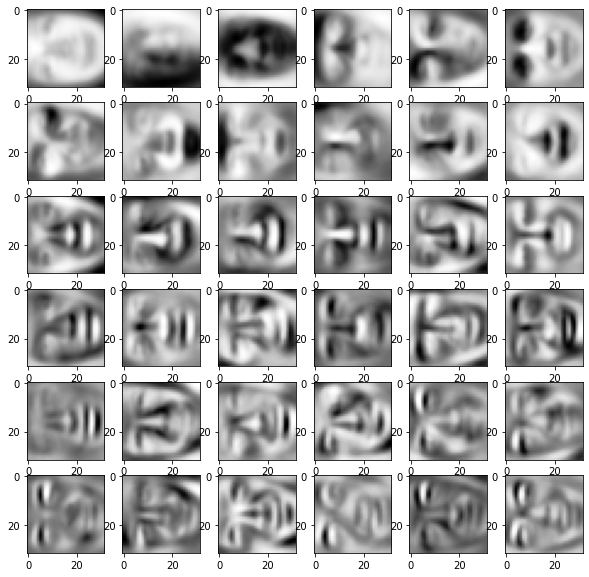

In [ ]:
#display principle compoments
displayData(U[:, :36].T)
U[:, :36]

In [ ]:
K = 100 #the dimention to which dataset is reduced, value can be adjusted to see effect
Z = projectData(X_norm, U, K)
print('Shape of original data is',X_norm.shape,'\nThe projected data Z ,after applying PCA, has a shape of: ', Z.shape)

Shape of original data is (5000, 1024) 
The projected data Z ,after applying PCA, has a shape of:  (5000, 100)


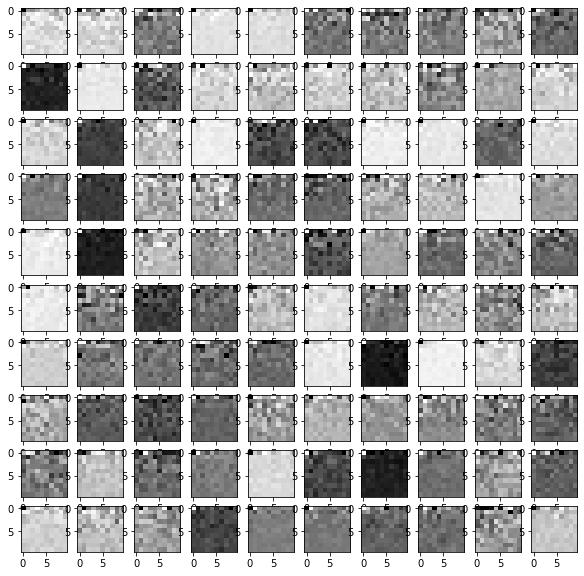

In [ ]:
displayData(Z[:100, :])

In [ ]:
X_rec  = recoverData(Z, U, K)

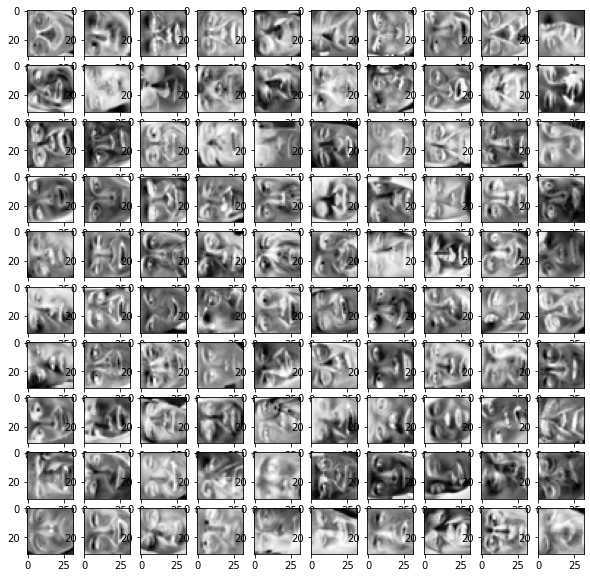

In [ ]:
displayData(X_norm[:100, :])

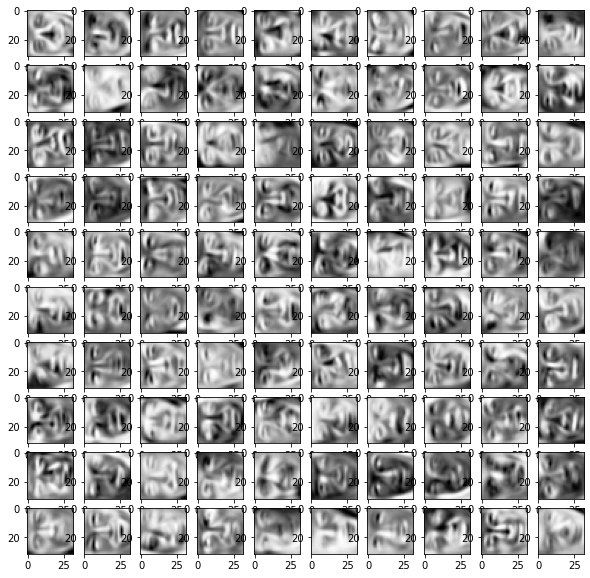

In [ ]:
displayData(X_rec[:100, :])

# Conclution 
It can be can see that PCA can be used for dimentinality reduction as original information of data is retained after reconstruction. PCA uses the concept of eigen vectors and eigen values to retain the principle components of the data.